In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [18]:
df = pd.read_csv('/content/Datos históricos Dow Jones Industrial Average.csv')

In [19]:
df.head()


,Date,Open,High,Low,Close,Volume
0,27/01/20,28542.49,28671.79,28440.47,28535.80,337273033
1,28/01/20,28594.28,28823.23,28575.75,28722.85,352936400
2,29/01/20,28820.53,28944.24,28728.19,28734.45,305932822
3,30/01/20,28640.16,28879.71,28489.76,28859.44,326846956
4,31/01/20,28813.04,28813.04,28169.53,28256.03,403885466


In [20]:
df.tail()

,Date,Open,High,Low,Close,Volume
725,09/12/22,33746.71,33844.63,33462.65,33476.46,292616631
726,12/12/22,33519.50,34005.04,33519.50,34005.04,321122440
727,13/12/22,34268.44,34712.28,33890.88,34108.64,443976509
728,14/12/22,34086.07,34395.65,33704.17,33966.35,344321181
729,15/12/22,33773.00,33773.00,33016.16,33202.22,394295009


In [21]:
df.describe()

,Open,High,Low,Close,Volume
count,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,31298.975082,31514.718671,31069.421562,31299.335356,3.816307e+08
std,3766.405506,3727.147544,3810.737486,3769.630309,1.113930e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,1.319330e+08
25%,28732.672500,28886.002500,28582.900000,28723.515000,3.101418e+08
50%,32161.665000,32429.085000,31897.425000,32156.225000,3.553468e+08
75%,34428.520000,34610.890000,34208.547500,34394.752500,4.214551e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,9.226796e+08


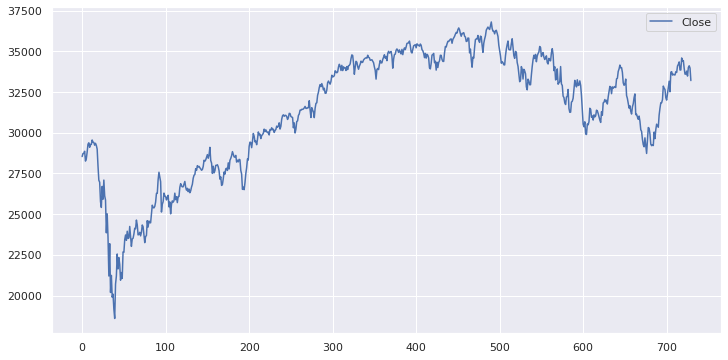

In [22]:
df[['Close']].plot(figsize=(12,6));


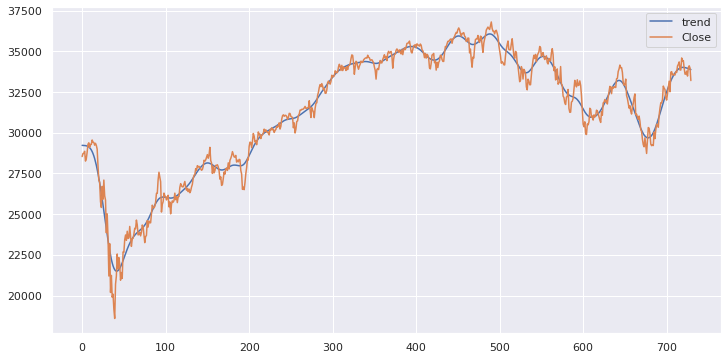

In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [24]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.5857763779658516,
 0.4907344693732179,
 9,
 720,
 {'1%': -3.439464954327953,
  '5%': -2.8655625802683473,
  '10%': -2.5689120852623457},
 10550.69131106081)

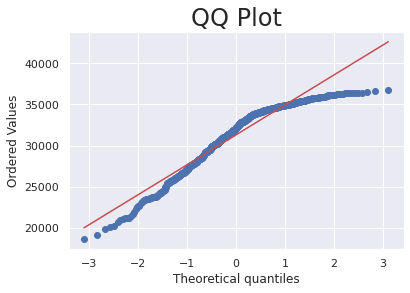

In [25]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [26]:
df['returns'] = df.Close.pct_change(1)*100

In [27]:
df['sq_returns'] = df.returns.mul(df.returns)


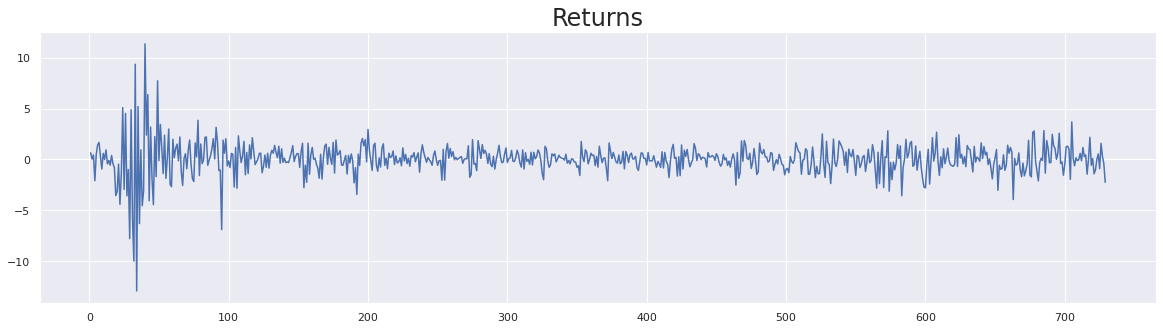

In [28]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


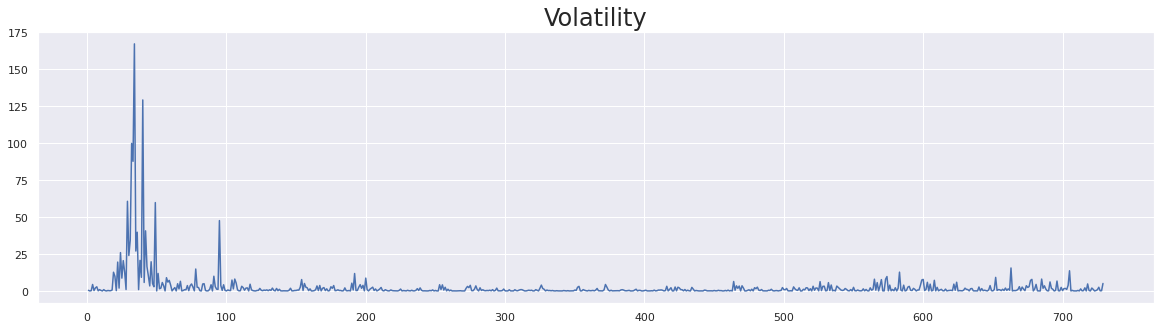

In [29]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

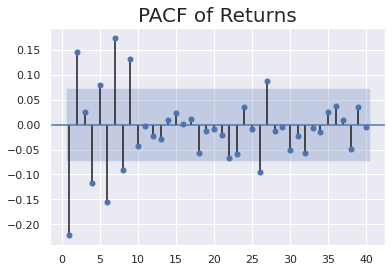

In [30]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

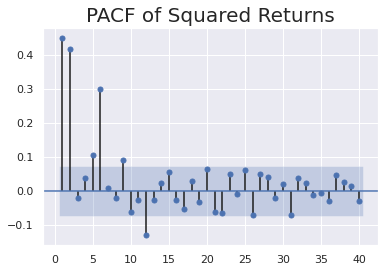

In [31]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [32]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 14.6 MB/s eta 0:00:00


In [33]:
from arch import arch_model


In [34]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [35]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4110.135893312808
Iteration:      2,   Func. Count:     13,   Neg. LLF: 282486.1653754168
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1243.7118207718127
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1238.4102398625073
Iteration:      5,   Func. Count:     28,   Neg. LLF: 1238.0554150856829
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1238.055233671813
Iteration:      7,   Func. Count:     35,   Neg. LLF: 1238.0552336718813
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1238.055233671813
            Iterations: 7
            Function evaluations: 35
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1238.06
Distribution:                  Normal   AIC:                           2482.11
Method:            Maximum Likelihood   BIC:                           2495.89
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1354  5.009e-02      2.703  6.876e-03 [3.721e-02,  0.234]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0674      0.120      8.929  4.306e-19 [  0.833,  1.302]
alpha[1]       0.6401      0.184      3.482  4.985e-04 [  0.280,  1.000]
========================================================================

Covariance estimator: robust
"""

In [36]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 1183.5003993033952
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1178.3114063025973
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1178.311406302579
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1178.31
Distribution:                  Normal   AIC:                           2364.62
Method:            Maximum Likelihood   BIC:                           2382.99
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0815  4.116e-02      1.980  4.766e-02 [8.389e-04,  0.162]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7359  9.178e-02      8.018  1.074e-15   [  0.556,  0.916]
alpha[1]       0.2432  7.553e-02      3.220  1.283e-03 [9.516e-02,  0.391]
alpha[2]       0.4170  9.329e-02      4.470  7.839e-06   [  0.234,  0.600]
==========================================================================

Covariance estimator: robust
"""

In [37]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1179.7177616306178
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1159.5189710529758
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1159.5189710529758
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1159.52
Distribution:                  Normal   AIC:                           2329.04
Method:            Maximum Likelihood   BIC:                           2352.00
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:22   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0492  3.842e-02      1.282      0.200 [-2.606e-02,  0.125]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5537  9.473e-02      5.845  5.062e-09   [  0.368,  0.739]
alpha[1]       0.1811  6.810e-02      2.659  7.838e-03 [4.760e-02,  0.315]
alpha[2]       0.3024  7.199e-02      4.201  2.657e-05   [  0.161,  0.444]
alpha[3]       0.2721  8.771e-02      3.103  1.918e-03   [  0.100,  0.444]
==========================================================================

Covariance estimator: robust
"""

In [38]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 1711.8757741978143
Iteration:     10,   Func. Count:    173,   Neg. LLF: 1179.1982218116934
Iteration:     15,   Func. Count:    258,   Neg. LLF: 1144.534581643752
Iteration:     20,   Func. Count:    343,   Neg. LLF: 1136.09612630754
Iteration:     25,   Func. Count:    422,   Neg. LLF: 1136.0907141979328
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1136.0907141978178
            Iterations: 25
            Function evaluations: 422
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1136.09
Distribution:                  Normal   AIC:                           2302.18
Method:            Maximum Likelihood   BIC:                           2371.06
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:22   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0584      0.834  7.004e-02      0.944 [ -1.576,  1.693]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3315      1.473      0.225      0.822   [ -2.555,  3.218]
alpha[1]       0.1500  7.146e-02      2.099  3.581e-02 [9.943e-03,  0.290]
alpha[2]       0.2076      3.236  6.416e-02      0.949   [ -6.135,  6.551]
alpha[3]       0.1204      1.327  9.074e-02      0.928   [ -2.481,  2.722]
alpha[4]       0.1340      5.044  2.656e-02      0.979   [ -9.751, 10.019]
alpha[5]       0.0265      1.101  2.404e-02      0.981   [ -2.132,  2.185]
alpha[6]       0.0340      0.139      0.244      0.807   [ -0.239,  0.307]
alpha[7]       0.0000     13.228      0.000      1.000   [-25.927, 25.927]
alpha[8]       0.0227      0.517  4.379e-02      0.965   [ -0.992,  1.037]
alpha[9]       0.0484      2.443  1.982e-02      0.984   [ -4.741,  4.837]
alpha[10]      0.0000      0.592      0.000      1.000   [ -1.160,  1.160]
alpha[11]      0.0396      0.473  8.364e-02      0.933   [ -0.888,  0.967]
alpha[12]      0.0000      0.626      0.000      1.000   [ -1.227,  1.227]
alpha[13]      0.0436      1.443  3.020e-02      0.976   [ -2.785,  2.872]
==========================================================================

Covariance estimator: robust
"""

In [39]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [40]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1141.5370700400422
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1141.5370140185037
            Iterations: 8
            Function evaluations: 52
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1141.54
Distribution:                  Normal   AIC:                           2291.07
Method:            Maximum Likelihood   BIC:                           2309.44
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0565  3.470e-02      1.627      0.104 [-1.156e-02,  0.124]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0688  2.997e-02      2.295  2.176e-02 [1.003e-02,  0.128]
alpha[1]       0.2000  5.715e-02      3.500  4.660e-04 [8.799e-02,  0.312]
beta[1]        0.7696  5.777e-02     13.320  1.760e-40   [  0.656,  0.883]
==========================================================================

Covariance estimator: robust
"""

In [41]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1142.851099026247
Iteration:     10,   Func. Count:     73,   Neg. LLF: 1141.5370148998954
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1141.5370140152097
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1141.54
Distribution:                  Normal   AIC:                           2293.07
Method:            Maximum Likelihood   BIC:                           2316.03
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0565  3.480e-02      1.622      0.105 [-1.175e-02,  0.125]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0688  2.797e-02      2.458  1.396e-02 [1.394e-02,  0.124]
alpha[1]       0.2000  4.803e-02      4.164  3.122e-05   [  0.106,  0.294]
beta[1]        0.7696      0.252      3.052  2.275e-03   [  0.275,  1.264]
beta[2]        0.0000      0.246      0.000      1.000   [ -0.483,  0.483]
==========================================================================

Covariance estimator: robust
"""

In [42]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 1142.7909230204282
Iteration:     10,   Func. Count:     81,   Neg. LLF: 1141.53701438682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1141.53701438682
            Iterations: 11
            Function evaluations: 87
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1141.54
Distribution:                  Normal   AIC:                           2295.07
Method:            Maximum Likelihood   BIC:                           2322.62
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0565  3.471e-02      1.627      0.104 [-1.156e-02,  0.125]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0688  2.855e-02      2.408  1.602e-02 [1.281e-02,  0.125]
alpha[1]       0.2000  4.811e-02      4.157  3.226e-05   [  0.106,  0.294]
beta[1]        0.7696      0.230      3.341  8.334e-04   [  0.318,  1.221]
beta[2]    2.1618e-15      0.303  7.146e-15      1.000   [ -0.593,  0.593]
beta[3]        0.0000      0.188      0.000      1.000   [ -0.369,  0.369]
==========================================================================

Covariance estimator: robust
"""

In [43]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1141.5582785704291
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1140.9566167596063
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1140.9566157327095
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1140.96
Distribution:                  Normal   AIC:                           2291.91
Method:            Maximum Likelihood   BIC:                           2314.87
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0520  3.584e-02      1.451      0.147 [-1.824e-02,  0.122]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0891  5.052e-02      1.764  7.766e-02 [-9.877e-03,  0.188]
alpha[1]       0.1532  6.537e-02      2.344  1.906e-02  [2.513e-02,  0.281]
alpha[2]       0.0805      0.111      0.727      0.467    [ -0.136,  0.297]
beta[1]        0.7249  9.975e-02      7.267  3.688e-13    [  0.529,  0.920]
===========================================================================

Covariance estimator: robust
"""

In [44]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1286.5415137354748
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1140.957019702983
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1140.9566157527254
            Iterations: 13
            Function evaluations: 105
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1140.96
Distribution:                  Normal   AIC:                           2293.91
Method:            Maximum Likelihood   BIC:                           2321.46
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0520  3.571e-02      1.456      0.145 [-1.800e-02,  0.122]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0891      0.121      0.737      0.461   [ -0.148,  0.326]
alpha[1]       0.1533  6.696e-02      2.289  2.208e-02 [2.203e-02,  0.285]
alpha[2]       0.0805      0.110      0.731      0.465   [ -0.135,  0.296]
alpha[3]       0.0000      0.191      0.000      1.000   [ -0.374,  0.374]
beta[1]        0.7249      0.291      2.493  1.268e-02   [  0.155,  1.295]
==========================================================================

Covariance estimator: robust
"""

In [45]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [46]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 2437.2152782256617
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1137.041805448489
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1137.0417161400765
            Iterations: 13
            Function evaluations: 93
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1137.04
Distribution:                  Normal   AIC:                           2284.08
Method:            Maximum Likelihood   BIC:                           2307.04
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:23   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0255  3.399e-02      0.751      0.453 [-4.110e-02,9.214e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0218  1.560e-02      1.397      0.162 [-8.775e-03,5.237e-02]
alpha[1]       0.2938  9.079e-02      3.236  1.211e-03      [  0.116,  0.472]
gamma[1]      -0.1214  3.517e-02     -3.451  5.579e-04   [ -0.190,-5.245e-02]
beta[1]        0.9565  1.747e-02     54.767      0.000      [  0.922,  0.991]
=============================================================================

Covariance estimator: robust
"""

In [47]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [48]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1136.90
Distribution:                  Normal   AIC:                           2283.80
Method:            Maximum Likelihood   BIC:                           2306.75
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:24   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0263  3.498e-02      0.751      0.452 [-4.228e-02,9.485e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0620  2.746e-02      2.258  2.394e-02  [8.185e-03,  0.116]
alpha[1]       0.1058  6.224e-02      1.699  8.926e-02 [-1.622e-02,  0.228]
gamma[1]       0.1698  7.442e-02      2.281  2.253e-02  [2.391e-02,  0.316]
beta[1]        0.7845  5.868e-02     13.369  9.147e-41    [  0.669,  0.900]
===========================================================================

Covariance estimator: robust
"""

In [49]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [50]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1140.8684824527945
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1133.1251447617701
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1133.1186295746122
            Iterations: 14
            Function evaluations: 99
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1133.12
Distribution:                  Normal   AIC:                           2276.24
Method:            Maximum Likelihood   BIC:                           2299.20
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:24   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0250  3.383e-02      0.738      0.461 [-4.135e-02,9.126e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0594  2.157e-02      2.756  5.849e-03  [1.717e-02,  0.102]
alpha[1]       0.0862  4.968e-02      1.736  8.254e-02 [-1.112e-02,  0.184]
gamma[1]       0.1601  4.275e-02      3.745  1.803e-04  [7.632e-02,  0.244]
beta[1]        0.8256  4.283e-02     19.275  8.771e-83    [  0.742,  0.910]
===========================================================================

Covariance estimator: robust
"""

In [51]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [52]:
from arch.univariate import FIGARCH

In [53]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 1140.3900839905964
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1139.361516444806
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1139.361516444806
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1139.36
Distribution:                  Normal   AIC:                           2288.72
Method:            Maximum Likelihood   BIC:                           2311.68
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:24   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0515  3.585e-02      1.437      0.151 [-1.875e-02,  0.122]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0655  3.771e-02      1.737  8.244e-02 [-8.418e-03,  0.139]
phi        8.1642e-14      0.129  6.305e-13      1.000    [ -0.254,  0.254]
d              0.7672      0.103      7.413  1.239e-13    [  0.564,  0.970]
beta           0.5641      0.109      5.164  2.419e-07    [  0.350,  0.778]
===========================================================================

Covariance estimator: robust
"""

In [54]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [55]:
from arch.univariate import HARCH

In [56]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1239.3824251643991
Iteration:     10,   Func. Count:     55,   Neg. LLF: 1238.0558073477082
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1238.0552336189312
            Iterations: 13
            Function evaluations: 66
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1238.06
Distribution:                  Normal   AIC:                           2482.11
Method:            Maximum Likelihood   BIC:                           2495.89
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1354  5.009e-02      2.703  6.882e-03 [3.720e-02,  0.234]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0674      0.120      8.929  4.308e-19 [  0.833,  1.302]
alpha[1]       0.6401      0.184      3.482  4.984e-04 [  0.280,  1.000]
========================================================================

Covariance estimator: robust
"""

In [57]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [58]:
from arch.univariate import APARCH


In [59]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1158.7186051931653
Iteration:     10,   Func. Count:     86,   Neg. LLF: 1134.8151271314387
Iteration:     15,   Func. Count:    122,   Neg. LLF: 1134.6579379593147
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1134.6579307402617
            Iterations: 17
            Function evaluations: 135
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1134.66
Distribution:                  Normal   AIC:                           2281.32
Method:            Maximum Likelihood   BIC:                           2308.87
                                        No. Observations:                  729
Date:                Sat, Jan 28 2023   Df Residuals:                      728
Time:                        01:40:25   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0259  3.428e-02      0.755      0.450 [-4.131e-02,9.305e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0629  2.414e-02      2.607  9.128e-03  [1.563e-02,  0.110]
alpha[1]       0.1764  5.553e-02      3.176  1.493e-03  [6.754e-02,  0.285]
gamma[1]       0.4325      0.256      1.692  9.074e-02 [-6.865e-02,  0.934]
beta[1]        0.8136  5.535e-02     14.699  6.549e-49    [  0.705,  0.922]
delta          1.1059      0.439      2.520  1.173e-02    [  0.246,  1.966]
===========================================================================

Covariance estimator: robust
"""

In [60]:
from scipy import stats


In [61]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=82.23837109977521, pvalue=0.0)

In [62]:
jarque_bera_test.statistic

82.23837109977521

In [63]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [64]:
returns = df.returns[1:]
returns

1      0.655492
2      0.040386
3      0.434983
4     -2.090858
5      0.508847
         ...   
725   -0.902921
726    1.578960
727    0.304661
728   -0.417167
729   -2.249668
Name: returns, Length: 729, dtype: float64

In [65]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=6427.658284328508, pvalue=0.0)

In [66]:
jarque_bera_test.statistic

6427.658284328508

In [67]:
jarque_bera_test.pvalue

0.0

curtosis

In [68]:
returns.kurt()

14.621387958615456

coef. asimetria

In [69]:
returns.skew()

-0.496182160255686

In [70]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -33.151
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [71]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -5.010
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [72]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.042
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [73]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.073
P-value                         0.734
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [74]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [75]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Open        730 non-null    float64
 2   High        730 non-null    float64
 3   Low         730 non-null    float64
 4   Close       730 non-null    float64
 5   Volume      730 non-null    int64  
 6   trend       730 non-null    float64
 7   returns     729 non-null    float64
 8   sq_returns  729 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 51.5+ KB


In [77]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [78]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [79]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [80]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [81]:
data = pd.read_csv("/content/Datos históricos Dow Jones Industrial Average.csv")

In [82]:
data

,Date,Open,High,Low,Close,Volume
0,27/01/20,28542.49,28671.79,28440.47,28535.80,337273033
1,28/01/20,28594.28,28823.23,28575.75,28722.85,352936400
2,29/01/20,28820.53,28944.24,28728.19,28734.45,305932822
3,30/01/20,28640.16,28879.71,28489.76,28859.44,326846956
4,31/01/20,28813.04,28813.04,28169.53,28256.03,403885466
...,...,...,...,...,...,...
725,09/12/22,33746.71,33844.63,33462.65,33476.46,292616631
726,12/12/22,33519.50,34005.04,33519.50,34005.04,321122440
727,13/12/22,34268.44,34712.28,33890.88,34108.64,443976509
728,14/12/22,34086.07,34395.65,33704.17,33966.35,344321181


In [83]:
data = data[["Date","Close","Volume"]]


In [84]:
data

,Date,Close,Volume
0,27/01/20,28535.80,337273033
1,28/01/20,28722.85,352936400
2,29/01/20,28734.45,305932822
3,30/01/20,28859.44,326846956
4,31/01/20,28256.03,403885466
...,...,...,...
725,09/12/22,33476.46,292616631
726,12/12/22,34005.04,321122440
727,13/12/22,34108.64,443976509
728,14/12/22,33966.35,344321181


In [85]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,27/01/20,28535.80,337273033,28722.85
1,28/01/20,28722.85,352936400,28734.45
2,29/01/20,28734.45,305932822,28859.44
3,30/01/20,28859.44,326846956,28256.03
4,31/01/20,28256.03,403885466,28399.81
...,...,...,...,...
725,09/12/22,33476.46,292616631,34005.04
726,12/12/22,34005.04,321122440,34108.64
727,13/12/22,34108.64,443976509,33966.35
728,14/12/22,33966.35,344321181,33202.22


In [86]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,27/01/20,28535.80,337273033,28722.85
1,28/01/20,28722.85,352936400,28734.45
2,29/01/20,28734.45,305932822,28859.44
3,30/01/20,28859.44,326846956,28256.03
4,31/01/20,28256.03,403885466,28399.81
...,...,...,...,...
724,08/12/22,33781.48,272733486,33476.46
725,09/12/22,33476.46,292616631,34005.04
726,12/12/22,34005.04,321122440,34108.64
727,13/12/22,34108.64,443976509,33966.35


In [87]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [88]:
price_volume_target_scaled_df

array([[0.54613483, 0.25967867, 0.55640794],
       [0.55640794, 0.27948699, 0.55704503],
       [0.55704503, 0.22004497, 0.5639097 ],
       ...,
       [0.8465151 , 0.23925418, 0.852205  ],
       [0.852205  , 0.39461883, 0.84439018],
       [0.84439018, 0.26859195, 0.80242282]])

In [89]:
price_volume_target_scaled_df.shape

(729, 3)

In [90]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [91]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [92]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [93]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [94]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

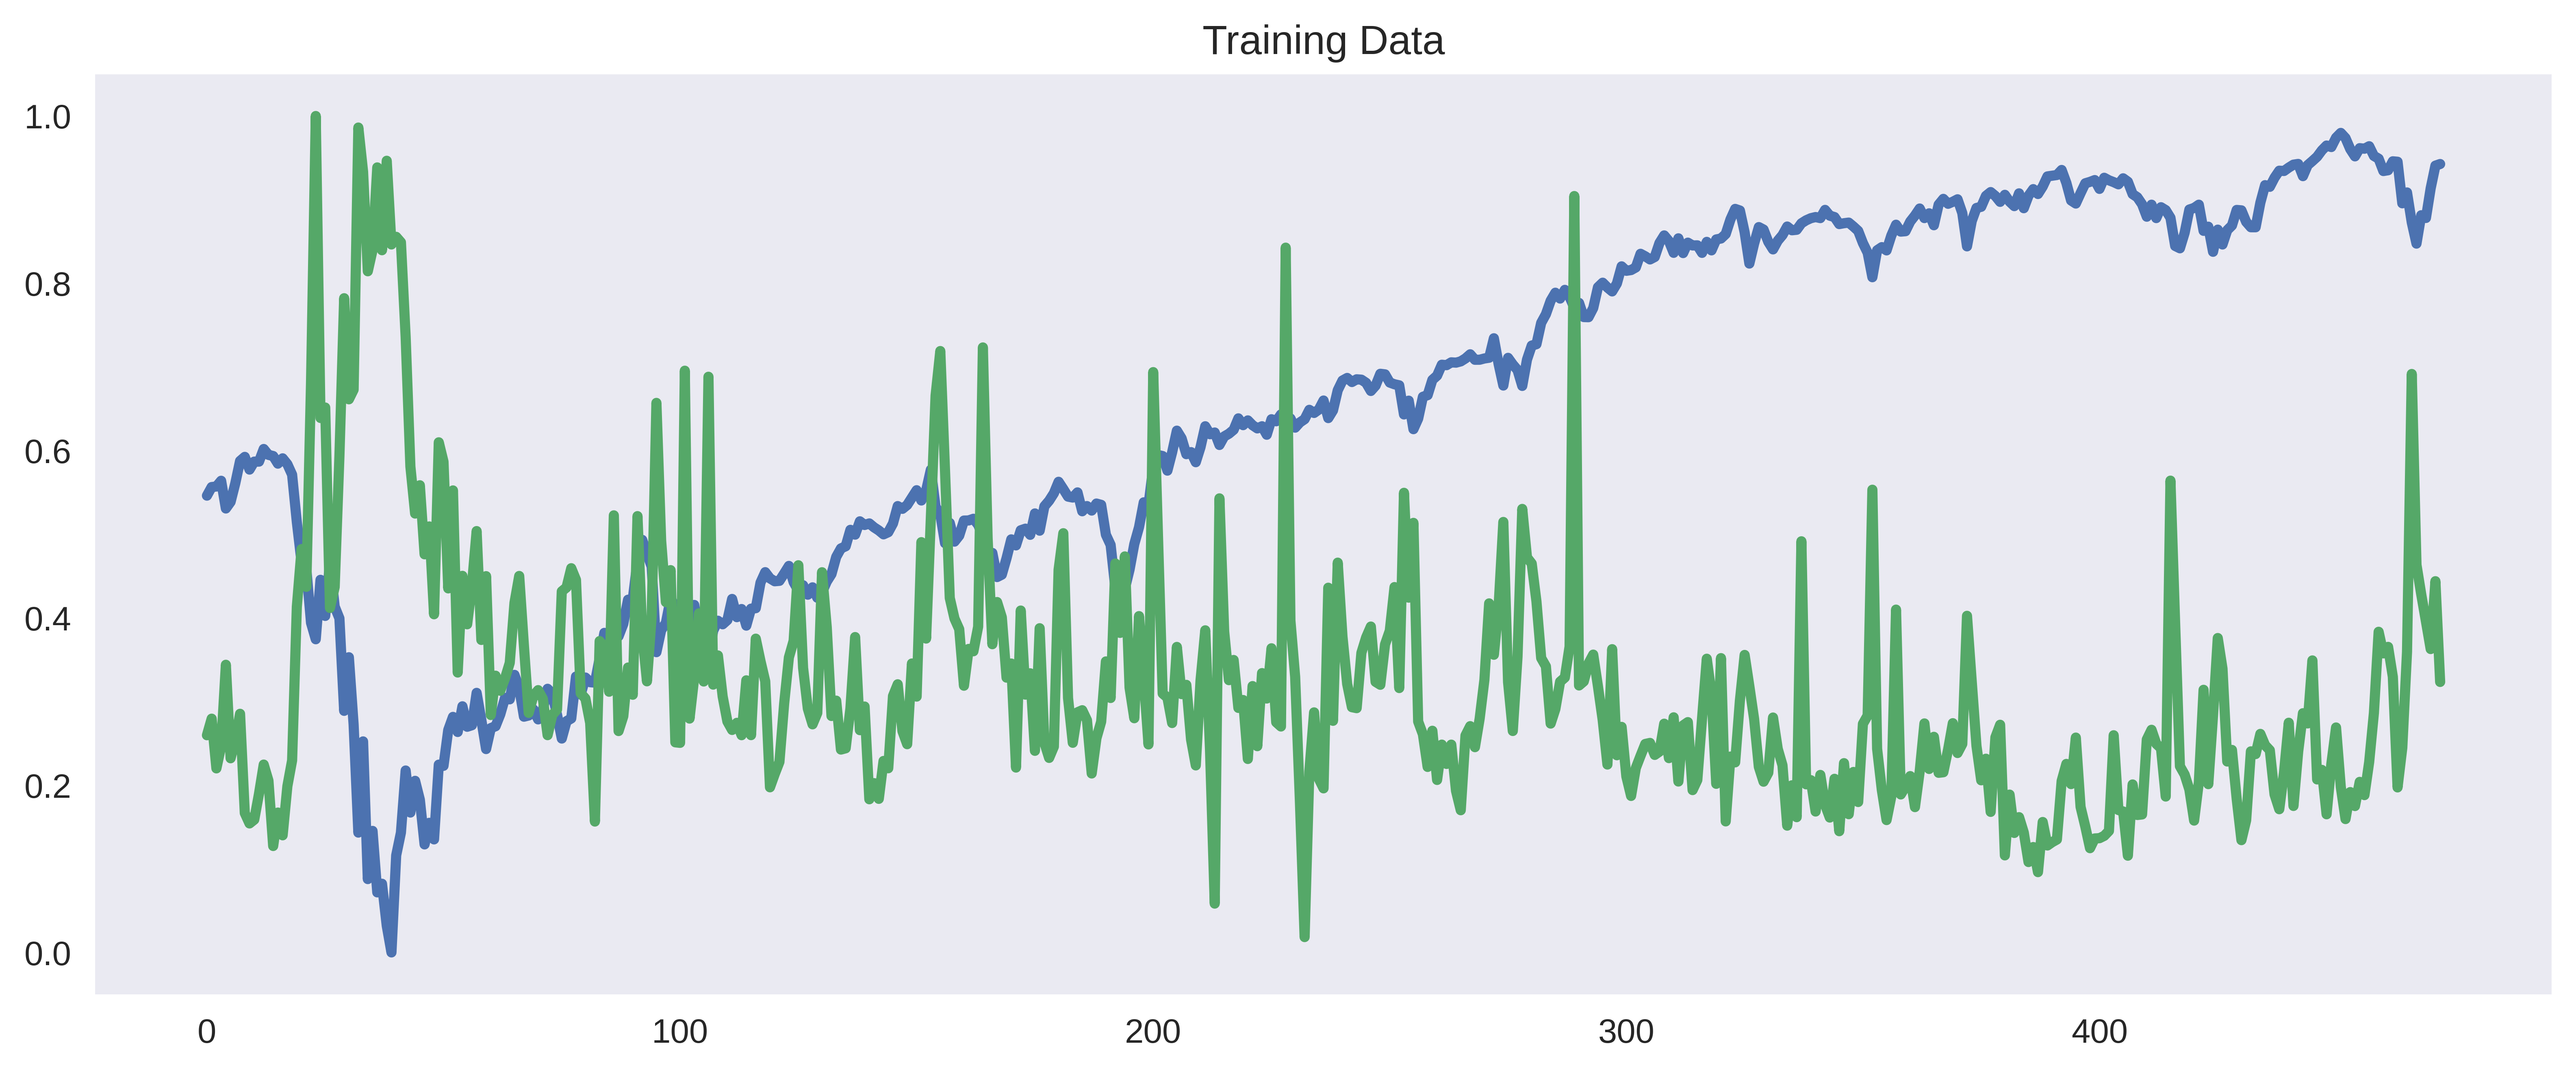

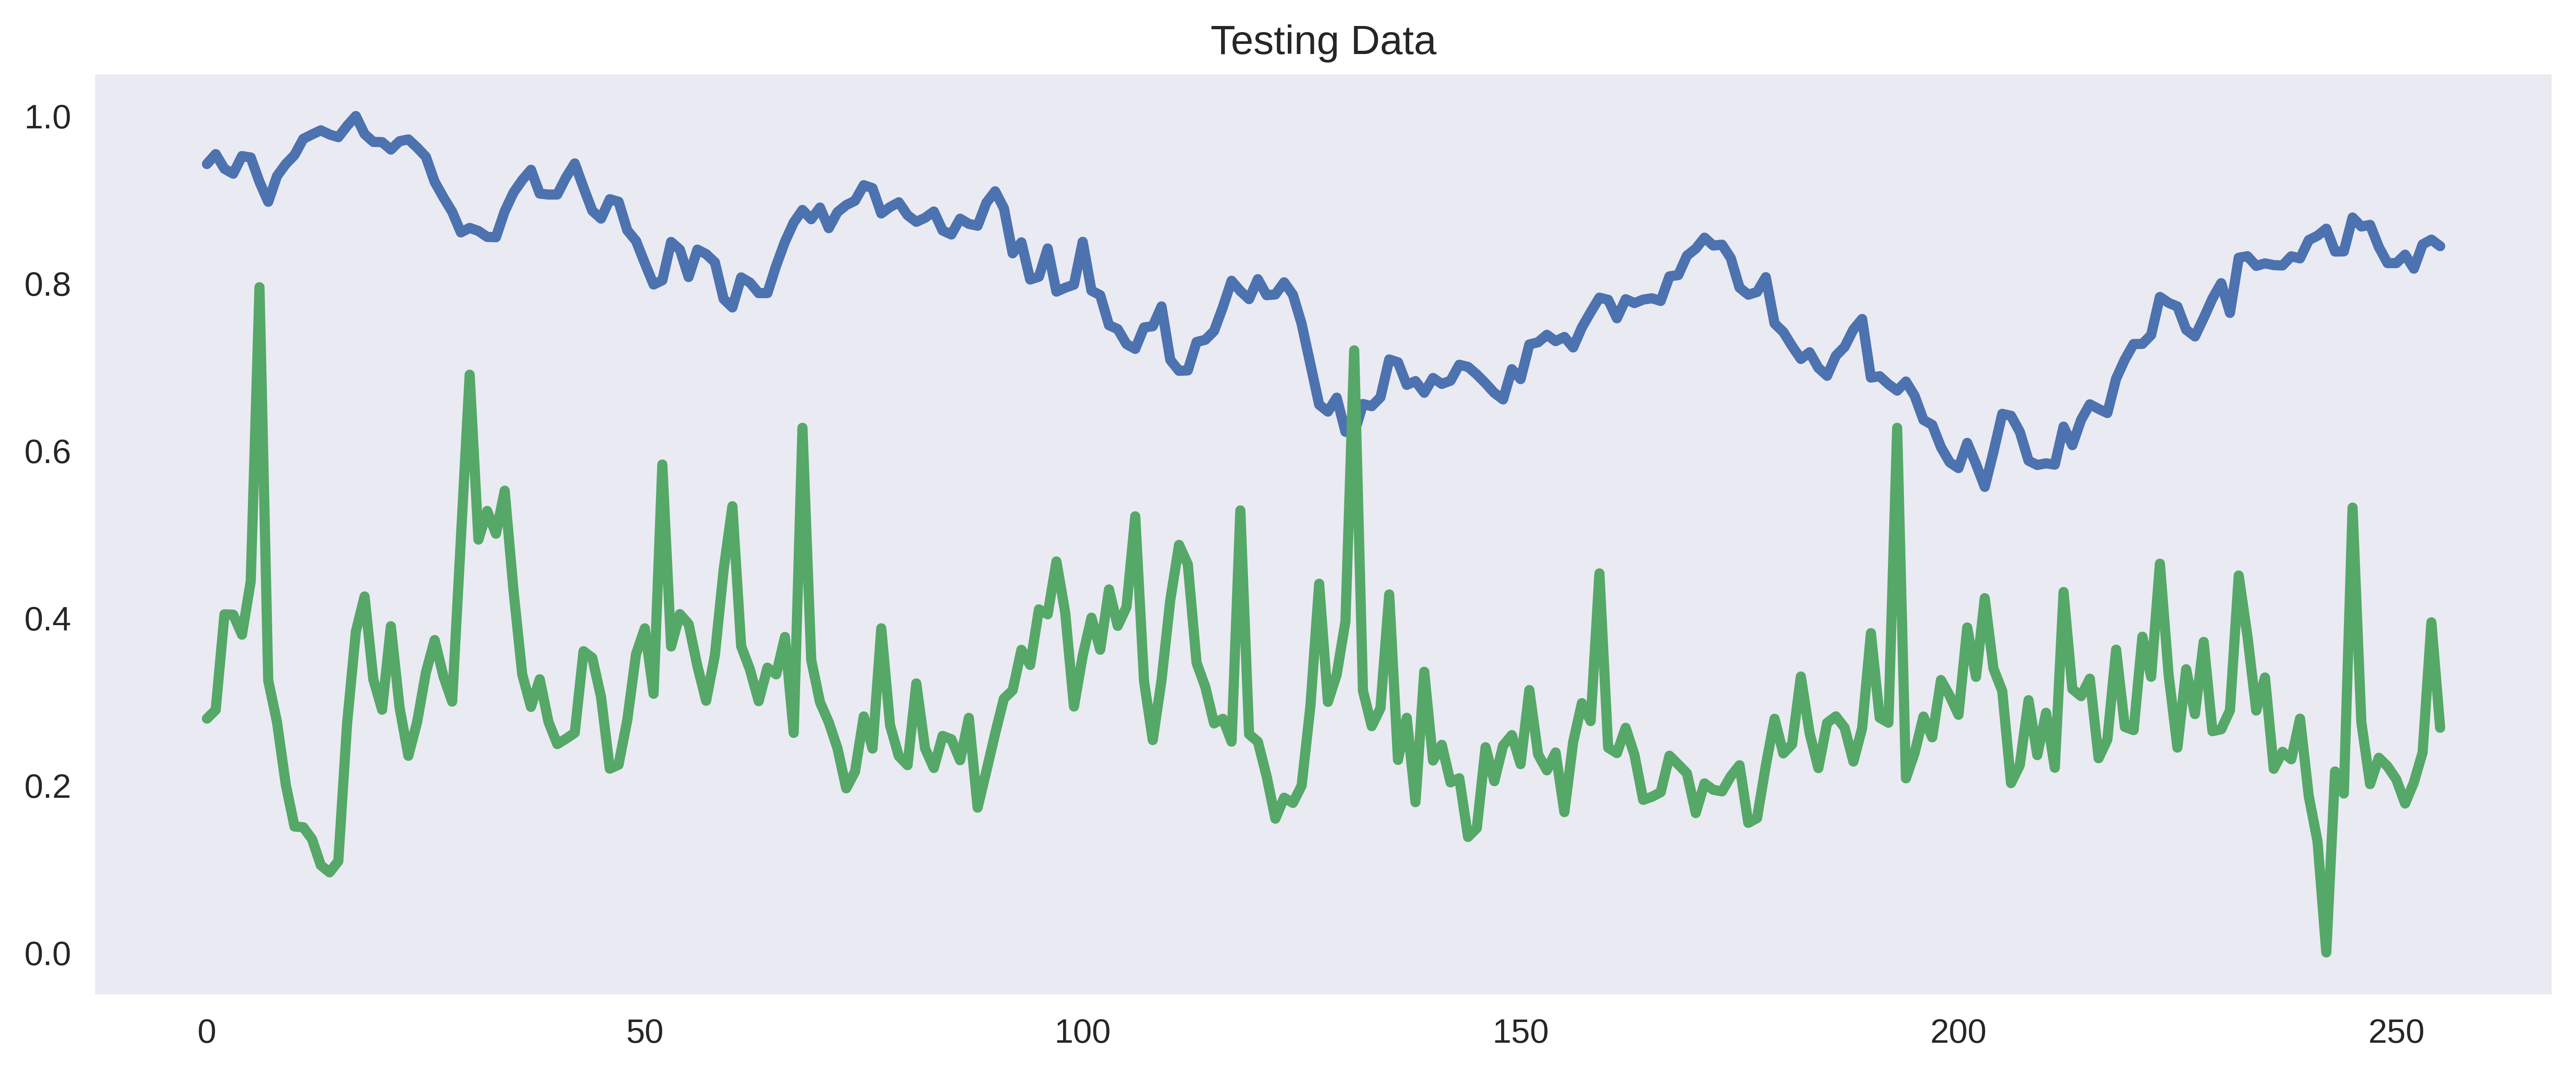

In [95]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [96]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [97]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.944828085578264


In [98]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.55576158],
       [0.5645205 ],
       [0.56782773],
       [0.57307866],
       [0.53747332],
       [0.54999224],
       [0.57006268],
       [0.59359302],
       [0.60359239],
       [0.58983797],
       [0.5986346 ],
       [0.59720437],
       [0.609818  ],
       [0.60407474],
       [0.60633306],
       [0.59594327],
       [0.60316563],
       [0.59387723],
       [0.58071925],
       [0.51906541],
       [0.4704979 ],
       [0.46616232],
       [0.39354032],
       [0.3605496 ],
       [0.44383182],
       [0.40266926],
       [0.47419672],
       [0.42297744],
       [0.4026054 ],
       [0.28998346],
       [0.35577389],
       [0.27958391],
       [0.14379154],
       [0.24872105],
       [0.09934331],
       [0.15236967],
       [0.07872833],
       [0.09296343],
       [0.04092228],
       [0.01541822],
       [0.12413954],
       [0.15003701],
       [0.22501055],
       [0.1847818 ],
       [0.22301996],
       [0.20028579],
       [0.15375648],
       [0.176

In [99]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [100]:
len(Predicted)

729

In [101]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [102]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,27/01/20
1,28/01/20
2,29/01/20
3,30/01/20
4,31/01/20
...,...
724,08/12/22
725,09/12/22
726,12/12/22
727,13/12/22


In [103]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,27/01/20,0.546135
1,28/01/20,0.556408
2,29/01/20,0.557045
3,30/01/20,0.563910
4,31/01/20,0.530769
...,...,...
724,08/12/22,0.834237
725,09/12/22,0.817485
726,12/12/22,0.846515
727,13/12/22,0.852205


In [104]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,27/01/20,0.546135,0.555762
1,28/01/20,0.556408,0.564521
2,29/01/20,0.557045,0.567828
3,30/01/20,0.563910,0.573079
4,31/01/20,0.530769,0.537473
...,...,...,...
724,08/12/22,0.834237,0.830426
725,09/12/22,0.817485,0.813525
726,12/12/22,0.846515,0.839185
727,13/12/22,0.852205,0.837458


In [105]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [106]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [107]:
data

,Date,Close,Volume,Target
0,27/01/20,28535.80,337273033,28722.85
1,28/01/20,28722.85,352936400,28734.45
2,29/01/20,28734.45,305932822,28859.44
3,30/01/20,28859.44,326846956,28256.03
4,31/01/20,28256.03,403885466,28399.81
...,...,...,...,...
725,09/12/22,33476.46,292616631,34005.04
726,12/12/22,34005.04,321122440,34108.64
727,13/12/22,34108.64,443976509,33966.35
728,14/12/22,33966.35,344321181,33202.22


In [108]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,27/01/20,28535.80,337273033,28722.85
1,28/01/20,28722.85,352936400,28734.45
2,29/01/20,28734.45,305932822,28859.44
3,30/01/20,28859.44,326846956,28256.03
4,31/01/20,28256.03,403885466,28399.81
...,...,...,...,...
725,09/12/22,33476.46,292616631,34005.04
726,12/12/22,34005.04,321122440,34108.64
727,13/12/22,34108.64,443976509,33966.35
728,14/12/22,33966.35,344321181,33202.22


In [109]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.85358000e+04, 3.37273033e+08],
       [2.87228500e+04, 3.52936400e+08],
       [2.87344500e+04, 3.05932822e+08],
       ...,
       [3.41086400e+04, 4.43976509e+08],
       [3.39663500e+04, 3.44321181e+08],
       [3.32022200e+04, 3.94295009e+08]])

In [110]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [111]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [112]:
X

[array([0.54613483]),
 array([0.55640794]),
 array([0.55704503]),
 array([0.5639097]),
 array([0.53076937]),
 array([0.53866602]),
 array([0.56106421]),
 array([0.5876035]),
 array([0.59248714]),
 array([0.57725954]),
 array([0.58683295]),
 array([0.58680659]),
 array([0.60191446]),
 array([0.59487844]),
 array([0.59349276]),
 array([0.58438179]),
 array([0.59074393]),
 array([0.5837112]),
 array([0.57121265]),
 array([0.51455482]),
 array([0.46625442]),
 array([0.45945676]),
 array([0.39404769]),
 array([0.37442524]),
 array([0.4454918]),
 array([0.40232824]),
 array([0.46677618]),
 array([0.41352514]),
 array([0.39943771]),
 array([0.28883847]),
 array([0.35293985]),
 array([0.27248277]),
 array([0.14327384]),
 array([0.25229353]),
 array([0.08768753]),
 array([0.14529277]),
 array([0.07178219]),
 array([0.08212231]),
 array([0.03196721]),
 array([0.]),
 array([0.11604858]),
 array([0.14327]),
 array([0.21750334]),
 array([0.16722852]),
 array([0.20516297]),
 array([0.18262748]),
 ar

In [113]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [114]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [115]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [116]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [117]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 11s 140ms/step - loss: 0.3506 - val_loss: 0.5608
Epoch 2/20
13/13 [==============================] - 0s 19ms/step - loss: 0.1169 - val_loss: 0.0091
Epoch 3/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0370 - val_loss: 0.0475
Epoch 4/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0251 - val_loss: 0.0394
Epoch 5/20
13/13 [==============================] - 0s 18ms/step - loss: 0.0173 - val_loss: 0.0139
Epoch 6/20
13/13 [==============================] - 0s 17ms/step - loss: 0.0143 - val_loss: 0.0208
Epoch 7/20
13/13 [==============================] - 0s 17ms/step - loss: 0.0114 - val_loss: 0.0094
Epoch 8/20
13/13 [==============================] - 0s 17ms/step - loss: 0.0092 - val_loss: 0.0070
Epoch 9/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0065 - val_loss: 0.0042
Epoch 10/20
13/13 [==============================] - 0s 17ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 1

In [118]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 5ms/step


In [119]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [120]:
test_predicted

[0.52744025,
 0.53721267,
 0.5378202,
 0.544377,
 0.5129065,
 0.5203633,
 0.5416567,
 0.5671606,
 0.57188636,
 0.5571849,
 0.56641597,
 0.5663906,
 0.5810369,
 0.5742038,
 0.57286054,
 0.5640488,
 0.57019824,
 0.56340164,
 0.55137414,
 0.4976771,
 0.452963,
 0.4467482,
 0.38792437,
 0.37062094,
 0.43404064,
 0.39527372,
 0.45344087,
 0.40525624,
 0.39270508,
 0.29698187,
 0.3518553,
 0.28324574,
 0.17845747,
 0.26643762,
 0.1353764,
 0.18004456,
 0.12326645,
 0.13112824,
 0.093371384,
 0.06979836,
 0.15720892,
 0.17845446,
 0.23785388,
 0.19739038,
 0.22782993,
 0.20967904,
 0.16740084,
 0.18766776,
 0.17207968,
 0.24358302,
 0.24241027,
 0.277757,
 0.2908962,
 0.27579784,
 0.30155995,
 0.28100184,
 0.28253192,
 0.31520185,
 0.28771824,
 0.25886708,
 0.27969316,
 0.28150252,
 0.29347768,
 0.3101236,
 0.30862075,
 0.33360377,
 0.3200375,
 0.29109555,
 0.29229918,
 0.2984675,
 0.2883725,
 0.29813382,
 0.3193622,
 0.31424317,
 0.292993,
 0.26927707,
 0.28656247,
 0.28933027,
 0.33188012,


In [121]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,28/01/20
2,29/01/20
3,30/01/20
4,31/01/20
5,03/02/20
...,...
725,09/12/22
726,12/12/22
727,13/12/22
728,14/12/22


In [122]:
df_predicted['predictions'] = test_predicted

In [123]:
df_predicted

,Date,predictions
1,28/01/20,0.527440
2,29/01/20,0.537213
3,30/01/20,0.537820
4,31/01/20,0.544377
5,03/02/20,0.512906
...,...,...
725,09/12/22,0.818505
726,12/12/22,0.800610
727,13/12/22,0.831698
728,14/12/22,0.837833


In [124]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [125]:
df_predicted['Close'] = close[1:]

In [126]:
df_predicted

,Date,predictions,Close
1,28/01/20,0.527440,0.556408
2,29/01/20,0.537213,0.557045
3,30/01/20,0.537820,0.563910
4,31/01/20,0.544377,0.530769
5,03/02/20,0.512906,0.538666
...,...,...,...
725,09/12/22,0.818505,0.817485
726,12/12/22,0.800610,0.846515
727,13/12/22,0.831698,0.852205
728,14/12/22,0.837833,0.844390


In [127]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")